# データ描画

In [38]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Users/kumada/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/kumada/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


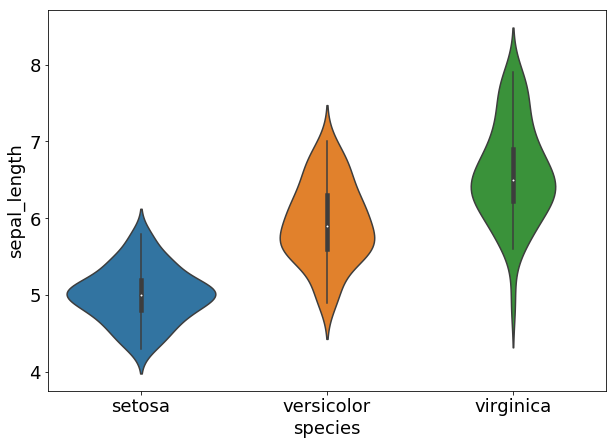

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 18
plt.figure(figsize=(10,7))
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.show()

# データセット作成
$x$としてsepal_lengthを、$y$として(setosa, versicolor)を選ぶ。

In [17]:
import pandas as pd

df = iris.query("species == ('setosa', 'versicolor')")
x = df['sepal_length'].values
y = pd.Categorical(df['species']).codes
print('x.shape', x.shape)
print('y.shape', y.shape)

x.shape (100,)
y.shape (100,)


In [18]:
x

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

# 識別モデル

In [30]:
import pymc3 as pm

with pm.Model() as model_0:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    z = alpha + pm.math.dot(x, beta)
    fs = pm.Deterministic('fs', 1 / (1 + pm.math.exp(-z)))
    bd = pm.Deterministic('bd', -alpha / beta)
    yl = pm.Bernoulli('yl', p=fs, observed=y)
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:16<00:00, 1360.67draws/s]
The acceptance probability does not match the target. It is 0.8812644726724994, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8860463873302307, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


収束具合を見る。1.1未満なら合格。

In [24]:
pm.gelman_rubin(trace)

{'alpha': 1.000311530637659,
 'bd': 1.0000098219645124,
 'beta': 1.0002833728290148,
 'theta': array([1.00034282, 1.00042681, 1.00045178, 1.00045337, 1.0003954 ,
        1.00004189, 1.00045337, 1.0003954 , 1.00044598, 1.00042681,
        1.00004189, 1.00044399, 1.00044399, 1.00043957, 0.99997732,
        0.99994327, 1.00004189, 1.00034282, 0.99994327, 1.00034282,
        1.00004189, 1.00034282, 1.00045337, 1.00034282, 1.00044399,
        1.0003954 , 1.0003954 , 1.00026191, 1.00026191, 1.00045178,
        1.00044399, 1.00004189, 1.00026191, 0.9999616 , 1.00042681,
        1.0003954 , 0.9999616 , 1.00042681, 1.00044598, 1.00034282,
        1.0003954 , 1.00045094, 1.00044598, 1.0003954 , 1.00034282,
        1.00044399, 1.00034282, 1.00045337, 1.00015406, 1.0003954 ,
        1.00025521, 1.00017443, 1.00024465, 0.9999616 , 1.00019248,
        0.99994327, 1.00015293, 1.00042681, 1.00020789, 1.00026191,
        1.0003954 , 1.00001894, 1.00005975, 1.00009612, 0.99993173,
        1.00022137, 0.

$\alpha$と$\beta$の事後確率から統計量を計算する。

In [25]:
varnames = ['alpha', 'beta', 'bd']
pm.summary(trace, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,-23.373321,4.075533,0.079697,-31.006518,-15.010131,2683.531591,1.000312
beta,4.316298,0.755472,0.014764,2.788823,5.758305,2677.868360,1.000283
bd,5.416217,0.069939,0.000579,5.279038,5.551557,15765.016484,1.000010


事後確率から計算されるシグモイド関数を描画する。

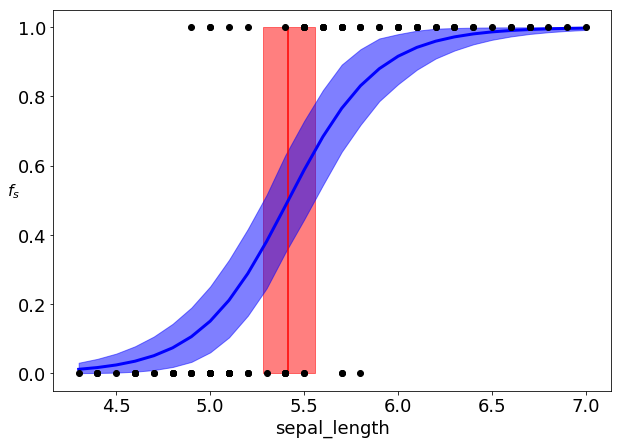

In [35]:
import numpy as np
plt.figure(figsize=(10,7))

# シグモイド関数のサンプル値を取り出す。
fs = trace['fs'] 

# シグモイド関数の平均値を計算する。
fs_mean= fs.mean(axis=0)

# xを降順に並べる。
idx = np.argsort(x)

# 平均値を描画する。
plt.plot(x[idx], fs_mean[idx], color='b', lw=3)

# 境界線のサンプル値を取り出す。
bd = trace['bd']

# 境界線の平均値を描画する。
plt.vlines([bd.mean()], ymin=0, ymax=1, color='r')

# 境界線の最高事後密度（Highest Posterior Density)を計算する。
bd_hpd = pm.hpd(bd)

# 境界線のHPDを描画する。
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='r', alpha=0.5)

# 観測データを描画する。
plt.plot(x, y, 'o', color='k')

# シグモイド関数のHPDを計算する。
fs_hpd = pm.hpd(fs)[idx]

# シグモイド関数のHPDを描画する。
plt.fill_between(x[idx], fs_hpd[:,0], fs_hpd[:,1], color='b', alpha=0.5)

plt.xlabel('sepal_length')
plt.ylabel(r'$f_s$', rotation=0, fontsize=16)
plt.show()
plt.close()

$x$=5.4程度のところが境界線になる。

# 生成モデル